#**1.Introduction**

>>Context

>Kerala is a state in South India known for its beautiful beaches and backwaters. Also known as 'God's own country' it was named one of the 10 paradises of the world by National Geographic.
Due to climate change, Kerala has been affected by unprecedented rainfall/floods in recent years. This dataset was obtained from Indian government's open data initiative to understand the trends.

 > Machine Learning algorithms to predict the chances of Flood in the state of Kerala using the Kerela flood dataset from almost the past 100 years 


> Here we are using 4 Machine Learning Algorithms which are KNN Classification, Logistic Regression, Support Vector Machine, and Decision Tree to obtain the best possible model to predict the flooding conditions using Kerela's rainfall data which is pertaining to the past 100 years of rainfall in the state 


>>*This raw dataset has the monthly and annual rainfall in millimeters (mms) from the year 1901 to 2018.*


#**2. Method**

The analysis follows the steps as below.

1. Review the data structure and clean it if it is necessary.
2. Proceeding Exploratory Data Analysis to review the rainfall situation.
3. Predict the rainfall by season and then seek other methods to improve the prediction.
4. Use Algorithm methods to predict and evaluate the performance.
5. Use HyperParameters over models to predict and review the outputs.

#**3.EDA**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/kerela-flood/kerala.csv')
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


Finding number of missing values


In [3]:
df.isnull().sum()

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [4]:
print(df.shape)

(118, 16)


In [5]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [6]:
df.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1.000000,-0.225531,0.003879,-0.012842,0.086865,-0.059661,-0.174938,-0.223403,0.044173,0.107655,-0.030223,-0.130129,-0.123643,-0.198048
JAN,-0.225531,1.000000,0.019613,0.078626,0.034807,0.071420,0.189375,0.034423,0.008677,-0.113502,-0.035044,-0.011034,-0.089809,0.118648
FEB,0.003879,0.019613,1.000000,0.245375,0.123706,-0.083500,0.054114,0.005789,0.023259,0.066317,0.053133,-0.162880,-0.127025,0.061457
MAR,-0.012842,0.078626,0.245375,1.000000,0.074014,-0.102961,0.019000,0.018330,0.042411,0.143850,-0.023066,-0.032612,0.026292,0.116103
APR,0.086865,0.034807,0.123706,0.074014,1.000000,-0.114566,0.072990,0.014977,-0.047842,0.012928,0.113172,0.022206,-0.110392,0.112358
MAY,-0.059661,0.071420,-0.083500,-0.102961,-0.114566,1.000000,0.001235,-0.046518,-0.124412,0.116860,0.197102,0.094934,-0.118077,0.314723
JUN,-0.174938,0.189375,0.054114,0.019000,0.072990,0.001235,1.000000,0.094939,-0.014549,-0.052634,0.001156,0.015967,-0.085188,0.453407
JUL,-0.223403,0.034423,0.005789,0.018330,0.014977,-0.046518,0.094939,1.000000,0.154467,0.209441,0.025223,-0.028526,-0.013573,0.651990
AUG,0.044173,0.008677,0.023259,0.042411,-0.047842,-0.124412,-0.014549,0.154467,1.000000,0.098215,-0.181496,-0.112729,0.142090,0.413036
SEP,0.107655,-0.113502,0.066317,0.143850,0.012928,0.116860,-0.052634,0.209441,0.098215,1.000000,-0.032348,-0.027615,-0.011007,0.428344


In [7]:
df['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [8]:
df.drop('SUBDIVISION',axis = 1,inplace=True)

In [9]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


#**4. Analyze**

In [10]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6


In [12]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

*Let's see how the rainfall index varies during the rainy season, usually from  June to September.* 

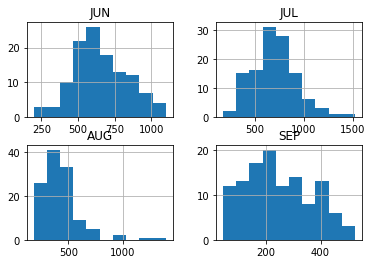

In [13]:
AvgIndex = df[['JUN','JUL','AUG','SEP']]
AvgIndex.hist()
plt.show()

*Data is widely distributed , let's scale it down to 0 and 1*

In [14]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit_transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.95570189, 0.2388724 ,
        0.49072457],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.37952709, 0.60039565,
        0.52316779],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.37563604, 0.29129575,
        0.50012478],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.28105358, 0.11622156,
        0.0448382 ],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.18258007, 0.18793274,
        0.02008984],
       [1.        , 0.34850299, 0.65949367, ..., 0.28105358, 0.3214639 ,
        1.        ]])

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

#Prediction Algorithms:


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [17]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    print(classification_report(ytest, ypred))
    
    return model

##*1. KNN Alogrithm*

---



In [18]:
knn = mymodel(KNeighborsClassifier())

Training Accuracy : 0.9878048780487805
Testing Accuracy : 0.9722222222222222


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.95      1.00      0.98        20

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



##*2. Logistic Regression Alogrithm*

---



In [19]:
logreg = mymodel(LogisticRegression())

Training Accuracy : 1.0
Testing Accuracy : 0.9722222222222222


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.95      0.97        20

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



##*3. Support Vector Machine Alogrithm*

---



In [20]:
svm = mymodel(SVC())

Training Accuracy : 0.975609756097561
Testing Accuracy : 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        20

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



##*4. Decision Tree Alogrithm*

---



In [21]:
dt = mymodel(DecisionTreeClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.9722222222222222


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.95      1.00      0.98        20

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



#Cross-validation


In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
knn_accuracy = cross_val_score(knn,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
knn_accuracy.mean()

0.9166666666666666

In [24]:
logreg_accuracy = cross_val_score(logreg,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
logreg_accuracy.mean()

0.9444444444444443

In [25]:
svm_accuracy = cross_val_score(svm,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
svm_accuracy.mean()

0.9166666666666666

In [26]:
dt_accuracy = cross_val_score(dt,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
dt_accuracy.mean()

0.9444444444444445

In [27]:
names = ['KNN','LogReg','SVM','DecisionTree']
score =[knn_accuracy.mean(),logreg_accuracy.mean(),svm_accuracy.mean(),dt_accuracy.mean()]

In [28]:
scores = pd.DataFrame({'Algorithm Name':names,'Score':score})

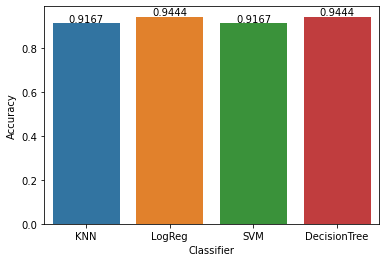

In [29]:
axis = sns.barplot(x='Algorithm Name',y='Score',data = scores)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    

In [30]:
scores # Cross-validation

,Algorithm Name,Score
0,KNN,0.916667
1,LogReg,0.944444
2,SVM,0.916667
3,DecisionTree,0.944444


#2nd Models 

##HyperParameter Tuning For Decsion Tree

In [31]:
dt = mymodel(DecisionTreeClassifier()) # Current Accuracy

Training Accuracy : 1.0
Testing Accuracy : 0.9722222222222222


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.95      1.00      0.98        20

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



# *GridSearchCV*

In [32]:
parameters = {
    "criterion":["gini", "entropy"],
    "max_depth": list(range(1,50, 5)),
    "min_samples_leaf": list(range(1, 50, 5))
}

In [33]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] criterion=gini, max_depth=1, min_samples_leaf=1 .................
[CV] .. criterion=gini, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1 .................
[CV] .. criterion=gini, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1 .................
[CV] .. criterion=gini, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1 .................
[CV] .. criterion=gini, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1 .................
[CV] .. criterion=gini, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=6 .................
[CV] .. criterion=gini, max_depth=1, min_samples_leaf=6, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=6 .................
[CV] .. crite

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . criterion=gini, max_depth=1, min_samples_leaf=26, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=26 ................
[CV] . criterion=gini, max_depth=1, min_samples_leaf=26, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=26 ................
[CV] . criterion=gini, max_depth=1, min_samples_leaf=26, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=31 ................
[CV] . criterion=gini, max_depth=1, min_samples_leaf=31, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=31 ................
[CV] . criterion=gini, max_depth=1, min_samples_leaf=31, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=31 ................
[CV] . criterion=gini, max_depth=1, min_samples_leaf=31, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=31 ................
[CV] . criterion=gini, max_depth=1, min_samples_leaf=31, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=31 ................
[CV] .

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.2s finished


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
                         'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                              46]},
             verbose=2)

In [34]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}

In [35]:
grid.best_score_

0.9757352941176471

In [36]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [37]:
dt2 = mymodel(grid.best_estimator_) # Post- HyperParameter Tuning For Decision Tree

Training Accuracy : 0.9878048780487805
Testing Accuracy : 0.9722222222222222


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.95      1.00      0.98        20

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



##HyperParameter Tuning For SVM

# *GridSearchCV*

In [38]:
parameters = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

In [39]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), parameters, verbose=3)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.529, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.529, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.529, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.529, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.529, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.9s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [40]:
grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [41]:
grid.best_score_

0.5367647058823529

In [42]:
grid.best_estimator_

SVC(C=10, gamma=0.0001)

In [43]:
svm = mymodel(grid.best_estimator_)

Training Accuracy : 1.0
Testing Accuracy : 0.4722222222222222


              precision    recall  f1-score   support

           0       0.46      1.00      0.63        16
           1       1.00      0.05      0.10        20

    accuracy                           0.47        36
   macro avg       0.73      0.53      0.36        36
weighted avg       0.76      0.47      0.33        36



##HyperParameter Tuning For LogReg

# *GridSearchCV*

In [44]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [45]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LogisticRegression(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l1, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l1, solver=newton-cg, total=   0.0s
[CV] C=0.001, penalty=l1, solver=lbfgs ...............................
[CV] ................ C=0.001, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=0.001, penalty=l1, solver=lbfgs ...............................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=0.001, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=0.001, penalty=l2, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=0.001, penalty=l2, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=0.001, penalty=l2, solver=newton-cg ...........................
[CV] ............ C=0.001, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ................ C=0.001, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ................ C=0.001, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ................ C=0.001, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    5.7s finished


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=2)

In [46]:
grid.best_params_

{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

In [47]:
grid.best_score_

0.975

In [48]:
grid.best_estimator_

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

In [49]:
logreg = mymodel(grid.best_estimator_)

Training Accuracy : 0.975609756097561
Testing Accuracy : 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        20

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



##HyperParameter Tuning For KNN

# *GridSearchCV*

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline(
    [
        ("sc", StandardScaler()),
        ("knn", KNeighborsClassifier())
    ]
)

In [51]:
from sklearn.model_selection import GridSearchCV
parameters = [{"knn__n_neighbors": [3, 5, 7, 9],
              "knn__weights": ["uniform", "distance"],
              "knn__leaf_size": [15, 20]}]

In [52]:
grid = GridSearchCV(pipe, parameters, cv=5, scoring="accuracy")
grid.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__leaf_size': [15, 20],
                          'knn__n_neighbors': [3, 5, 7, 9],
                          'knn__weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [53]:
grid.best_params_

{'knn__leaf_size': 15, 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}

In [54]:
grid.best_score_

0.8441176470588235

In [55]:
grid.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(leaf_size=15))])

In [56]:
knn2 = mymodel(grid.best_estimator_)

Training Accuracy : 0.8902439024390244
Testing Accuracy : 0.8611111111111112


              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.89      0.85      0.87        20

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1, stratify=y)

In [58]:
knn_accuracy = cross_val_score(knn2,xtest,ytest,cv=3,scoring='accuracy')
knn_accuracy.mean()

0.8055555555555555

In [59]:
logreg_accuracy = cross_val_score(logreg,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
logreg_accuracy.mean()

0.9166666666666666

In [60]:
svm_accuracy = cross_val_score(svm,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
svm_accuracy.mean()

0.7222222222222222

In [61]:
dt_accuracy = cross_val_score(dt,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
dt_accuracy.mean()

0.9722222222222222

In [62]:
names = ['KNN','LogReg','SVM','DecisionTree']
score =[knn_accuracy.mean(),logreg_accuracy.mean(),svm_accuracy.mean(),dt_accuracy.mean()]

In [63]:
scores_2nd = pd.DataFrame({'Algorithm Name':names,'Score':score})

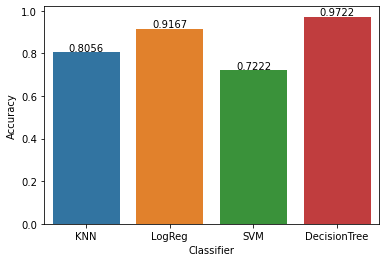

In [64]:
axis = sns.barplot(x='Algorithm Name',y='Score',data = scores_2nd)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    

In [65]:
scores_2nd # Cross-validation post HyperParameter Tuning 

,Algorithm Name,Score
0,KNN,0.805556
1,LogReg,0.916667
2,SVM,0.722222
3,DecisionTree,0.972222


In [66]:
scores # Cross-validation for the Base model

,Algorithm Name,Score
0,KNN,0.916667
1,LogReg,0.944444
2,SVM,0.916667
3,DecisionTree,0.944444


>Cross-validation post HyperParameter Tuning 

In [67]:
scores_2nd['Score'].max() 

0.9722222222222222

>Cross-validation for the Base model

In [68]:
scores['Score'].max() 

0.9444444444444445

# **5.Conlusion**
>This analysis aims to select a prediction model for rainfall forecasting. Since Kerala contributes a high amount of agricultural products in India, maximizing the outputs and minimizing the risks of confronting natural disasters are the concern of this analysis.


> We can see that the baseline model gave us an Accuracy of 94%, not disappointing but after tuning the model with the hyperparameters we were able to achieve 97% Accuracy over out model, 


> Hence, we can consider this model to predict the rainfall in the state of Kerala.  